**IMPORTS**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx import DiGraph
import scipy.linalg as la
from sklearn.cluster import KMeans
import csv
from google.colab import drive

drive.mount('/content/drive')
path1 ='drive/My Drive/Colab Notebooks/data/example1.dat'
path2 = 'drive/My Drive/Colab Notebooks/data/example2.dat'

Mounted at /content/drive


## **Data** **Loading**

In [ ]:
graph1 = nx.read_edgelist(path1, delimiter=",", create_using=DiGraph)
graph2 = nx.read_weighted_edgelist(path2, delimiter=",", create_using=DiGraph)

In [ ]:
print('Number of nodes Graph 1: ', len(graph1))
print('Number of nodes Graph 2: ', len(graph2))

Number of nodes Graph 1:  241
Number of nodes Graph 2:  100


## **Algorithm**

In [ ]:
def affinity_matrix(graph):
  A = np.asarray(nx.adjacency_matrix(graph).todense())
  return A

In [ ]:
def L_matrix(A):
    # Diagonal matrix (Aii = sum ith row of A)
    D = np.diag(np.sum(A, axis=1))
    # Root inverse of D
    D_root_inv = np.linalg.inv(np.sqrt(D))
    # Formula for A
    L = D_root_inv @ A @ D_root_inv
    return L

In [ ]:
def eigenvector_matrix(L,k):
    # Obtain eigenvectors of L
    X_values, X_vectors = la.eigh(L)
    # Take the k largest eigenvectors (are the k last ones)
    X = X_vectors[:, -k:]

    return X


In [ ]:
def Y_matrix(X):
  Y = X / np.sqrt(np.sum(pow(X, 2), axis=1)).reshape((-1, 1))
  return Y

## **Execution for Graph 1**

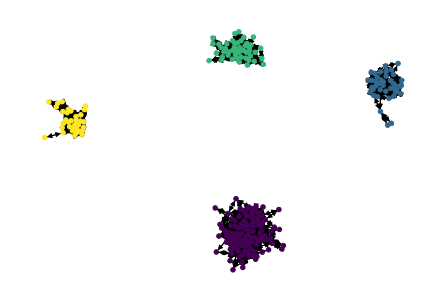

In [ ]:
k = 4
pos = nx.spring_layout(graph1)
A = affinity_matrix(graph1)
L = L_matrix(A)
X = eigenvector_matrix(L,k)
Y = Y_matrix(X)
clustering = KMeans(n_clusters=k).fit(Y)
labels = clustering.labels_

plt.figure()
nx.draw(graph1, node_size=20, node_color=labels)
plt.show()

## **Execution for Graph 2**

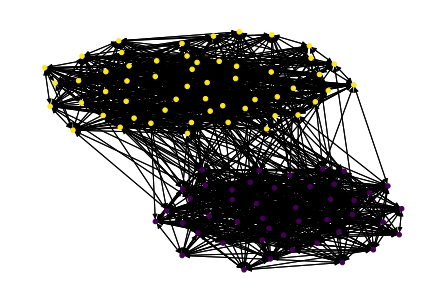

In [ ]:
k = 2
pos = nx.spring_layout(graph2)
A = affinity_matrix(graph2)
L = L_matrix(A)
X = eigenvector_matrix(L,k)
Y = Y_matrix(X)
clustering = KMeans(n_clusters=k).fit(Y)
labels = clustering.labels_

plt.figure()
nx.draw(graph2, node_size=20, node_color=labels)
plt.show()